In [23]:
import pandas as pd

data = pd.read_csv("./validate-2024-05-08-13-18-55-200/train.csv")
# plt.plot(data['time'], data['value'])
data

,Unnamed: 0,mean,Methane_0_1_-0.2500,Methane_0_1_-0.2250,Methane_0_1_-0.2000,Methane_0_1_-0.1750,Methane_0_1_-0.1500,Methane_0_1_-0.1250,Methane_0_1_-0.1000,Methane_0_1_-0.0750,...,Benzene_1_3_0.0250,Benzene_1_3_0.0500,Benzene_1_3_0.0750,Benzene_1_3_0.1000,Benzene_1_3_0.1250,Benzene_1_3_0.1500,Benzene_1_3_0.1750,Benzene_1_3_0.2000,Benzene_1_3_0.2250,Benzene_1_3_0.2500
0,0,35.982438,-17.091392,-25.071764,-30.180209,-32.137942,-36.253444,-36.560661,-34.394296,-27.638652,...,37.883885,38.290135,48.696185,79.252670,130.103109,129.757821,128.569684,134.545053,138.601183,141.624784
1,1,101.534946,52.819406,43.623997,37.810179,34.977081,32.284815,29.855248,29.912191,27.710519,...,148.908495,149.402308,155.708443,149.984548,147.656115,161.239204,176.048243,189.066442,197.289316,204.689594
2,2,46.411261,8.301292,17.825438,13.771341,11.400740,9.632852,4.778054,-0.841206,-1.415521,...,-1.768011,0.512047,-25.269480,-51.579448,14.263261,98.259928,133.836878,163.707218,189.323393,207.222719
3,3,33.611012,-45.320711,-34.066627,-31.478364,-29.814531,-28.803310,-27.731073,-29.436406,-27.257466,...,19.742707,21.326907,-49.677657,-105.398612,69.711213,-39.859351,-47.516980,-48.688141,-64.293921,-70.838978
4,4,23.557169,-22.301798,-21.074759,-17.406416,-14.021588,-11.465786,-8.519388,-6.263937,-3.936098,...,13.582523,15.563963,9.640249,8.545203,-14.529423,12.306871,18.747884,13.918846,9.433938,5.896843


35.98243783572521
33.520152312370485


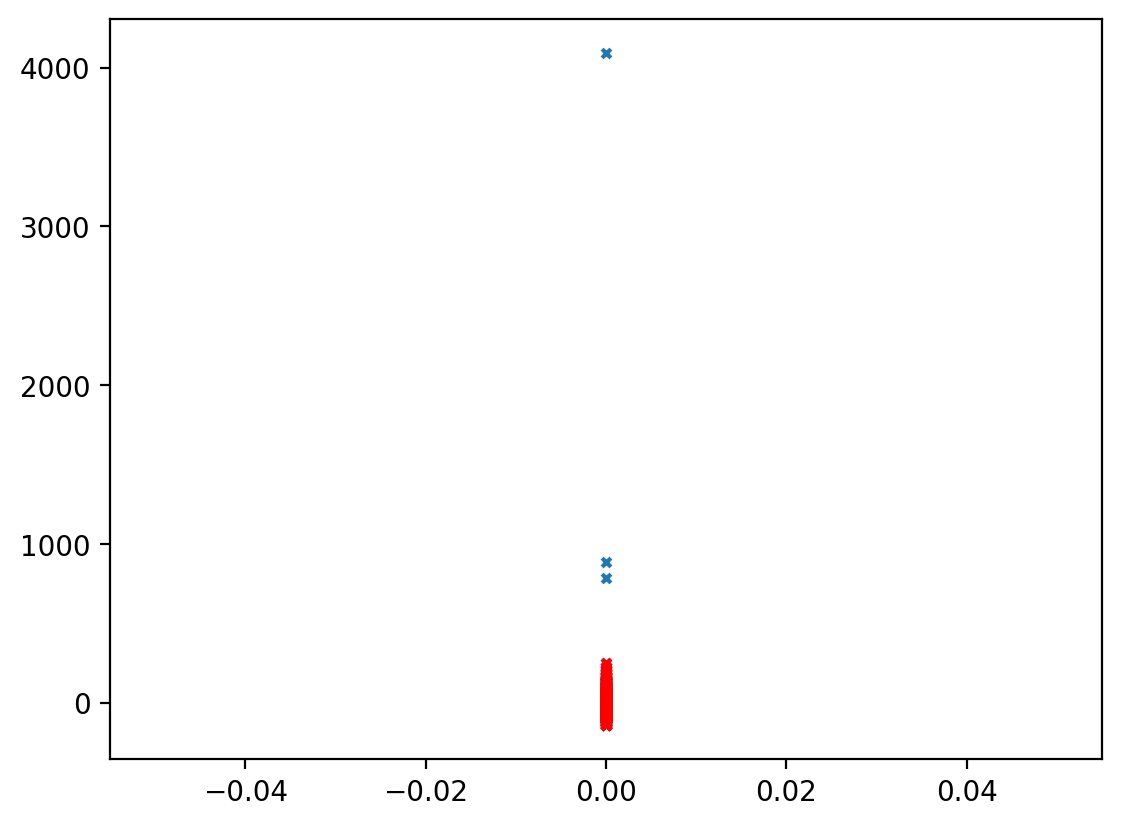

In [24]:
from matplotlib import pyplot as plt
import numpy as np

data_np = data.to_numpy()[0, 2 :]
plt.scatter(np.zeros_like(data_np), data_np, s=10, marker="x")
data_np_sort = np.sort(data_np)
print(np.mean(np.abs(data_np_sort)))

data_remove = data_np_sort[:-3]
print(np.mean(np.abs(data_remove)))
plt.scatter(np.zeros_like(data_remove), data_remove, s=10, marker="x", c="red")

14.577594728369137
13.124420522458408
193.1980737020845


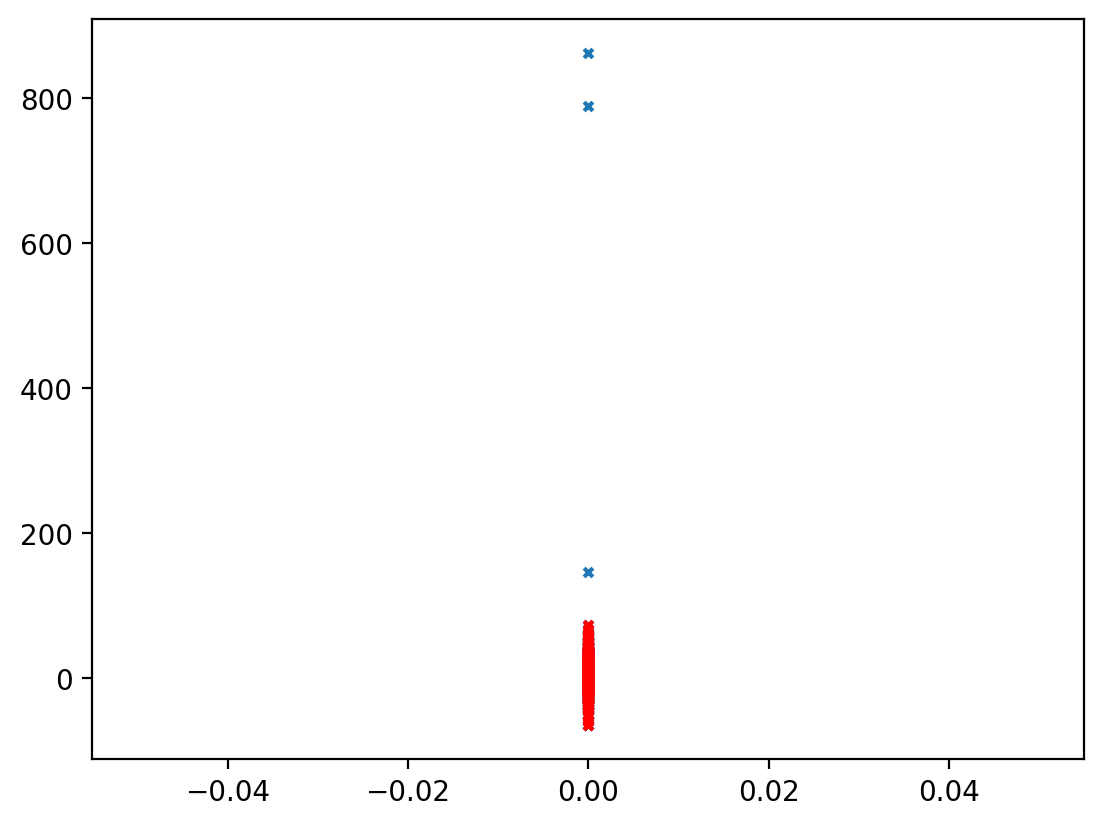

In [22]:
# from matplotlib import pyplot as plt
# import numpy as np

# data_np = data.to_numpy()[0, 2 : (21 * 2 * 3 - 5) * 10 + 2]
# plt.scatter(np.zeros_like(data_np), data_np, s=10, marker='x')
# data_np_sort = np.sort(data_np)
# print(np.mean(np.abs(data_np_sort)))

# data_remove = data_np_sort[:-3]
# print(np.mean(np.abs(data_remove)))
# plt.scatter(np.zeros_like(data_remove), data_remove, s=10, marker="x", c="red")

# data_np_2 = data.to_numpy()[0, (21 * 2 * 3 - 5) * 10 + 2:]
# print(np.mean(np.abs(data_np_2)))

In [21]:
print(np.linspace(-0.25, 0.25, 21))
print(np.linspace(-0.25, 0.25, 5))

[-0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25 ]
[-0.25  -0.125  0.     0.125  0.25 ]
